In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import cv2
from skimage import io 


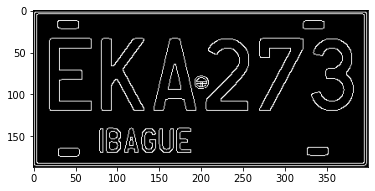

Para entrenamiento hay 1000 placas


,Unnamed: 0,L1,L2,L3,N1,N2,N3,PLACA
0,0,4,10,0,2,7,3,EKA273


In [2]:
#Training
training = np.load('../data/training/M_train_placa.npy')
DBtraining= pd.read_csv('../data/training/placas_train.csv')
plt.imshow(training[0],"gray")
plt.show()
print("Para entrenamiento hay {} placas".format(str(len(training))))
DBtraining.head(1)

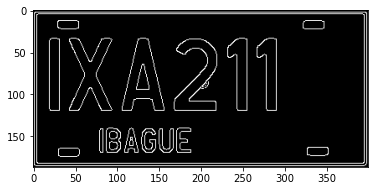

Para entrenamiento hay 300 placas


,Unnamed: 0,L1,L2,L3,N1,N2,N3,PLACA
0,0,8,23,0,2,1,1,IXA211


In [3]:
#Testing
testing = np.load('../data/testing/M_test_placa.npy')
DBtesting = pd.read_csv('../data/testing/placas_test.csv')
plt.imshow(testing[0],"gray")
plt.show()
print("Para entrenamiento hay {} placas".format(str(len(testing))))
DBtesting.head(1)

In [4]:
#Binarizando la imágen  
testing = testing/255
training = training/255
#Ajuste para que todas las letras tengan el mismo tamaño
def separa_letras(P_gris):
  L0 = P_gris[30:125,15:75]
  L1 = P_gris[30:125,75:135]
  L2 = P_gris[30:125,135:200]
  L3 = P_gris[30:125,200:260]
  L4 = P_gris[30:125,265:325]
  L5 = P_gris[30:125,330:390]
  return L0,L1,L2,L3,L4,L5

In [5]:
#Acondicionamos los vectores de entrada para la NN

#Imágen
def acond_img(letras_matriz):
    Xtl1 = []
    Xtl2 = []
    Xtl3 = []
    Xtl4 = []
    Xtl5 = []
    Xtl6 = []
    for i in range(len(letras_matriz)):
        l1,l2,l3,l4,l5,l6 = separa_letras(letras_matriz[i])
        Xtl1.append(np.reshape(l1,(5700)))
        Xtl2.append(np.reshape(l2,(5700))) 
        Xtl3.append(np.reshape(l3,(6175))) 
        Xtl4.append(np.reshape(l4,(5700))) 
        Xtl5.append(np.reshape(l5,(5700)))
        Xtl6.append(np.reshape(l6,(5700))) 

    Xtl1 = np.array(Xtl1)
    Xtl2 = np.array(Xtl2)
    Xtl3 = np.array(Xtl3)
    Xtl4 = np.array(Xtl4)
    Xtl5 = np.array(Xtl5)
    Xtl6 = np.array(Xtl6)
    return Xtl1,Xtl2,Xtl3,Xtl4,Xtl5,Xtl6

#Predicción
def acond_target(DB):
    Ytl1 = np.zeros([DB.shape[0],1])
    Ytl2 = np.zeros([DB.shape[0],1])
    Ytl3 = np.zeros([DB.shape[0],1])
    Ytl4 = np.zeros([DB.shape[0],1])
    Ytl5 = np.zeros([DB.shape[0],1])
    Ytl6 = np.zeros([DB.shape[0],1])
    for i in range(DB.shape[0]): 
        Ytl1[i]= DB.L1.values[i]
        Ytl2[i]= DB.L2.values[i]
        Ytl3[i]= DB.L3.values[i]
        Ytl4[i]= DB.N1.values[i]
        Ytl5[i]= DB.N2.values[i]
        Ytl6[i]= DB.N3.values[i]
    return Ytl1,Ytl2,Ytl3,Ytl4,Ytl5,Ytl6


In [6]:
#Imagen como vector(X)
Numero = ["0","1","2","3","4","5","6","7","8","9"]#Su equivalente numérico A=0, B=1...Z=25

#Datos training
Xtrl1,Xtrl2,Xtrl3,Xtrn1,Xtrn2,Xtrn3 = acond_img(training)

#Datos testing
Xtel1,Xtel2,Xtel3,Xten1,Xten2,Xten3 = acond_img(testing)


#Acondicionando prediccionesm(Y) "target"
letra = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']#Su equivalente numérico A=0, B=1...Z=25

#Datos training
Ytrl1,Ytrl2,Ytrl3,Ytrn1,Ytrn2,Ytrn3 = acond_target(DBtraining)

#Datos testing
Ytel1,Ytel2,Ytel3,Yten1,Yten2,Yten3 = acond_target(DBtesting)


In [7]:
Xtel3.shape

(300, 6175)

In [8]:
#Entrenamiento y validación para la letra 1
Cgen = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,15), random_state=1) # Clasificacion por red neuronal
l1 = Cgen.fit(Xtrl1,Ytrl1)
predl1 = l1.predict(Xtel1)
print(classification_report(Ytel1,predl1,target_names = letra))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        14
           B       1.00      1.00      1.00        12
           C       1.00      1.00      1.00         9
           D       1.00      1.00      1.00        10
           E       1.00      1.00      1.00        12
           F       1.00      1.00      1.00         8
           G       1.00      1.00      1.00        17
           H       1.00      1.00      1.00        12
           I       1.00      1.00      1.00        12
           J       1.00      1.00      1.00        13
           K       1.00      1.00      1.00         7
           L       1.00      1.00      1.00        10
           M       1.00      1.00      1.00        11
           N       1.00      1.00      1.00        12
           O       1.00      1.00      1.00         9
           P       1.00      1.00      1.00        16
           Q       1.00      1.00      1.00         7
           R       1.00    

In [9]:
#Entrenamiento y validación para la letra 2
l2 = Cgen.fit(Xtrl2,Ytrl2)
predl2 = l2.predict(Xtel2)
print(classification_report(Ytel2,predl2,target_names = letra))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        14
           B       0.94      1.00      0.97        15
           C       1.00      0.93      0.97        15
           D       1.00      1.00      1.00        12
           E       1.00      1.00      1.00        13
           F       1.00      1.00      1.00        15
           G       0.90      0.90      0.90        10
           H       0.95      1.00      0.97        18
           I       1.00      0.92      0.96        13
           J       0.89      0.89      0.89         9
           K       1.00      1.00      1.00        10
           L       1.00      1.00      1.00         8
           M       1.00      1.00      1.00         6
           N       0.92      1.00      0.96        11
           O       1.00      0.87      0.93        15
           P       1.00      1.00      1.00        11
           Q       1.00      1.00      1.00        15
           R       1.00    

In [10]:
#Entrenamiento y validación para la letra 3
l3 = Cgen.fit(Xtrl3,Ytrl3)
predl3 = l3.predict(Xtel3)
print(classification_report(Ytel3,predl3,target_names = letra))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           A       0.92      0.86      0.89        14
           B       1.00      0.91      0.95        11
           C       0.89      0.73      0.80        11
           D       0.92      1.00      0.96        12
           E       0.87      1.00      0.93        13
           F       0.82      1.00      0.90         9
           G       1.00      1.00      1.00         8
           H       1.00      1.00      1.00         4
           I       0.88      0.78      0.82         9
           J       0.86      0.75      0.80         8
           K       0.91      0.91      0.91        11
           L       0.94      0.94      0.94        16
           M       0.91      1.00      0.95        10
           N       0.92      1.00      0.96        12
           O       0.95      0.95      0.95        20
           P       1.00      1.00      1.00        11
           Q       1.00      1.00      1.00        13
           R       1.00    

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [11]:
#Entrenamiento y validación para numero 1
n1 = Cgen.fit(Xtrn1,Ytrn1)
predn1 = n1.predict(Xten1)
print(classification_report(Yten1,predn1,target_names = Numero))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       1.00      0.92      0.96        25
           2       1.00      0.96      0.98        28
           3       0.91      0.97      0.94        33
           4       0.97      1.00      0.98        30
           5       1.00      0.97      0.98        33
           6       0.92      0.96      0.94        25
           7       0.97      1.00      0.99        34
           8       0.97      0.97      0.97        29
           9       1.00      0.93      0.96        29

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [12]:
#Entrenamiento y validación para numero 2
n2 = Cgen.fit(Xtrn2,Ytrn2)
predn2 = n2.predict(Xten2)
print(classification_report(Yten2,predn2,target_names = Numero))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.93      0.89      0.91        28
           2       1.00      0.96      0.98        27
           3       1.00      0.83      0.90        23
           4       0.90      1.00      0.95        19
           5       0.97      0.97      0.97        30
           6       0.88      0.96      0.91        45
           7       0.97      0.97      0.97        36
           8       0.94      0.97      0.96        35
           9       0.93      0.89      0.91        28

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
#Entrenamiento y validación para numero 3
n3 = Cgen.fit(Xtrn3,Ytrn3)
predn3 = n3.predict(Xten3)
print(classification_report(Yten3,predn3,target_names = Numero))

/home/bryanc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.83      0.97      0.89        35
           2       0.93      1.00      0.96        26
           3       0.90      0.90      0.90        31
           4       1.00      0.92      0.96        25
           5       1.00      0.94      0.97        36
           6       1.00      0.95      0.98        43
           7       0.95      1.00      0.98        20
           8       1.00      0.96      0.98        26
           9       1.00      0.97      0.98        29

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Test gráfico

In [14]:
#Definimos una función que junte los clasificadores y haga la lectura de la placa perteneciente a la base de datos para testing
def test_read(T_I):
    image = io.imread('../data/testing/imagen_testing/'+str(T_I)+'.jpg')  
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convertir color 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
    ax1.imshow(image)
    ax2.imshow(testing[T_I],"gray")
    
    print("\nLa lectura de la placa es:")
    print("\n")
    print(
    letra[int(predl1[T_I])],
    letra[int(predl2[T_I])],
    letra[int(predl3[T_I])],
    int(predn1[T_I]),
    int(predn2[T_I]),
    int(predn3[T_I]))
    print("\n")



La lectura de la placa es:


I X F 2 1 1




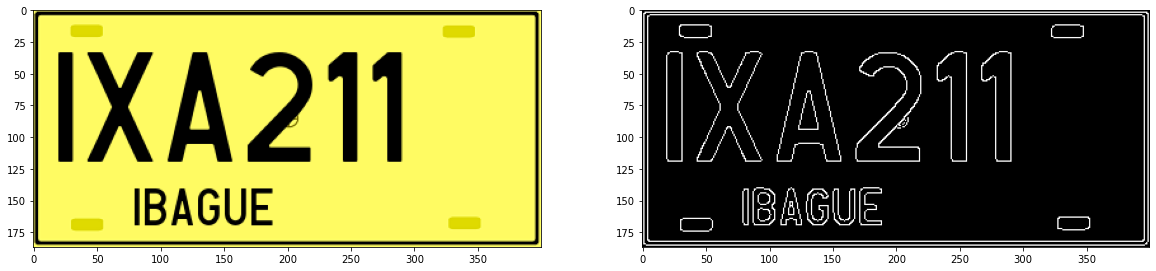

In [15]:
#Test gráfico
test_read(0)


La lectura de la placa es:


J W E 2 0 4




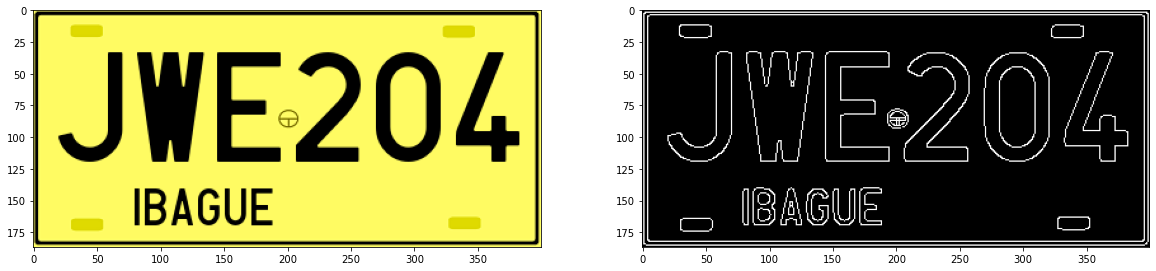

In [16]:
test_read(50)


La lectura de la placa es:


N Z Y 0 7 5




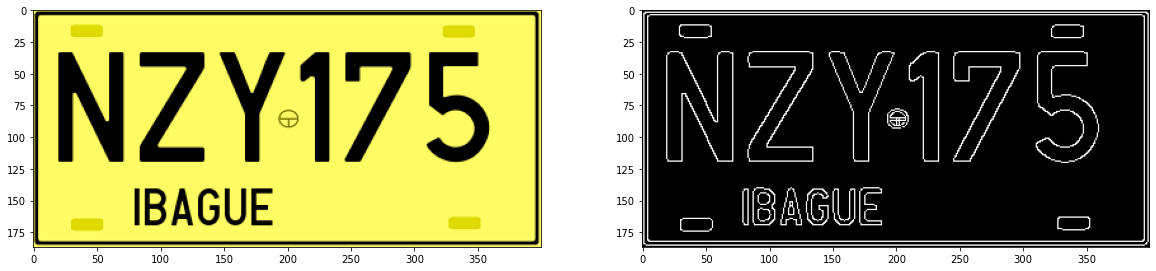

In [17]:
test_read(100)


La lectura de la placa es:


S Y O 7 6 9




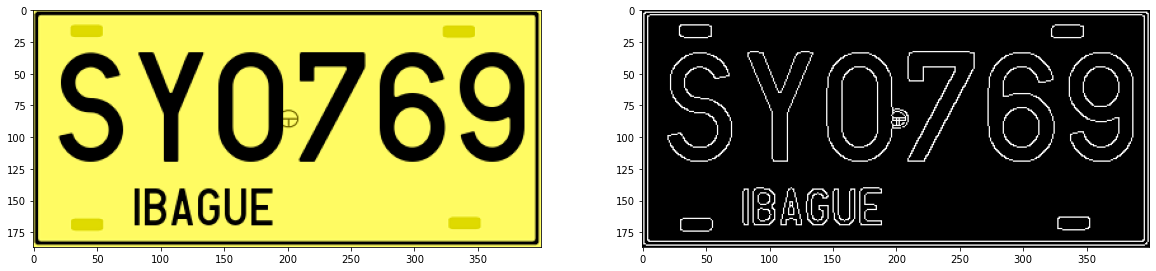

In [18]:
test_read(200)


La lectura de la placa es:


Z T Y 2 6 8




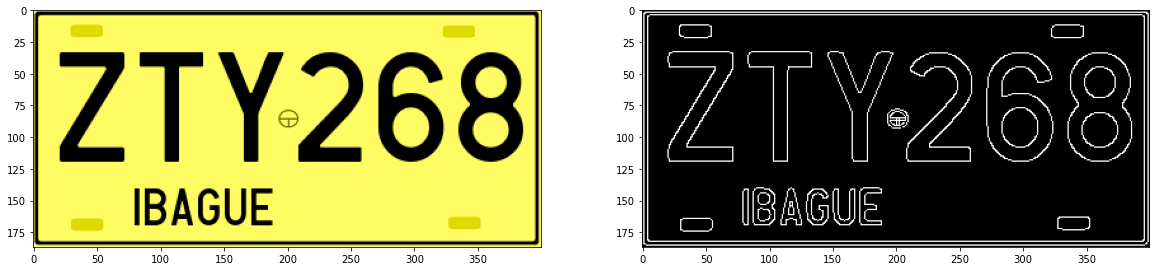

In [19]:
test_read(299)